## 데이터 일차 가공 및 모델 학습/예측/평가

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('data/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [2]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## DataFrame을 복사하고 이를 가공하여 반환하는 get_preprocseed_df 함수

In [3]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy=df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

## 데이터 가공 후 학습/테스트 데이터 세트를 반환하는 get_train_test_df 함수

In [4]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    #인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    #train_test_split()으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=37, stratify=y_target)
    #학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [5]:
print("학습 데이터 레이블 값 비율")
print(y_train.value_counts()/y_train.shape[0]*100)
print("테스트 데이터 레이블 값 비율")
print(y_test.value_counts()/y_test.shape[0]*100)


학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


## 평가지표 함수

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred = None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print("오차행렬")
    print(confusion)
    # ROC-AUC print 추가
    print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}".format(accuracy, precision, recall, f1, roc_auc))

## get_eval_by_threshold 함수

In [7]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test,custom_predict, pred_proba_c1)

## precision_recall_curve_plot 함수

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label="precision")
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel("Threshold Value"); plt.ylabel("Precision and Recall value")
    plt.legend(); plt.grid()
    plt.show()

## 로지스틱 회귀 모델이 데이터 가공을 수행하면서 예측 성능이 어떻게 변하는지 살펴보자

In [8]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용해 평가 수행
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[85279    16]
 [   69    79]]
정확도: 0.9990, 정밀도: 0.8316, 재현율: 0.5338, F1: 0.6502, AUC:0.9598


## 반복적으로 모델을 변경해 학습/예측/평가를 하기위한 함수

In [9]:
# 인자로 사이킷런의 Estimator객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

## LGBM 모델로 학습한 뒤 예측/평가 수행

In [10]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

오차행렬
[[85289     6]
 [   30   118]]
정확도: 0.9996, 정밀도: 0.9516, 재현율: 0.7973, F1: 0.8676, AUC:0.9734


## 데이터 분포도 변환 후 모델 학습/예측/평가

Amount 피처의 분포도 확인

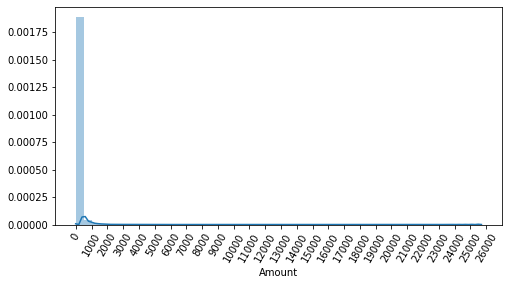

In [11]:
import seaborn as sns
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

로지스틱 회귀는 선형 모델이기에 피처값들이 정규분포를 따르는걸 좋아한다.

Amount 칼럼을 표준정규분포로 변환한 뒤에 로지스틱 회귀의 예측 성능 측정

In [12]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처값 변환하는 로직으로 수정.
def get_preprocessed_df(df=None):
    df_copy=df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    #변환된 Amount를 Amount_Scaled로 피처명 변경 후 DataFrame맨 앞 칼럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

## 함수 수정 후 다시 로지스틱/LGBM 모델을 학습/평가

In [13]:
# Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행.
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print("### 로지스틱 회귀 예측 성능 ###")
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print("### LightGBM 예측 성능 ###")
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85283    12]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8824, 재현율: 0.6081, F1: 0.7200, AUC:0.9810
### LightGBM 예측 성능 ###
오차행렬
[[85290     5]
 [   28   120]]
정확도: 0.9996, 정밀도: 0.9600, 재현율: 0.8108, F1: 0.8791, AUC:0.9752


## StandardScaler가 아닌 로그 변환 수행

In [14]:
def get_preprocessed_df(df=None):
    df_copy=df.copy()
    # 넘파이의 log1p() 를 이용해 Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    #변환된 Amount를 Amount_Scaled로 피처명 변경 후 DataFrame맨 앞 칼럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

## 로그 변환 후 다시 로지스틱 회귀/LGBM 모델 학습/평가

In [15]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print("### 로지스틱 회귀 예측 성능 ###")
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print("### LightGBM 예측 성능 ###")
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85283    12]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8824, 재현율: 0.6081, F1: 0.7200, AUC:0.9795
### LightGBM 예측 성능 ###
오차행렬
[[85289     6]
 [   30   118]]
정확도: 0.9996, 정밀도: 0.9516, 재현율: 0.7973, F1: 0.8676, AUC:0.9734


## 이상치 데이터 제거 후 모델 학습/예측/평가

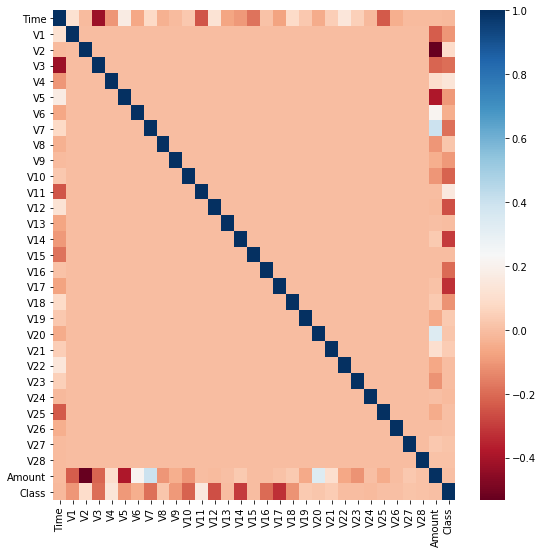

In [16]:
import seaborn as sns

plt.figure(figsize=(9 ,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

## IQR을 이용한 이상치를 검출하는 함수 생성

In [17]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    #fraud에 해당하는 column데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    fraud = df[df['Class'] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index 반환.
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

## get_outlier 함수를 이용해 V14 칼럼에서 이상치 탐색

In [18]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print("이상치 데이터 인덱스:", outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


## get_processed_df 함수에 이상치를 추출하고 이를 삭제하는 로직을 추가한다.

In [19]:
def get_preprocessed_df(df=None):
    df_copy=df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

## 이상치 삭제 후 다시 로지스틱/LGBM 모델 학습/평가

In [20]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print("### 로지스틱 회귀 예측 성능 ###")
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print("### LightGBM 예측 성능 ###")
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85285    10]
 [   51    95]]
정확도: 0.9993, 정밀도: 0.9048, 재현율: 0.6507, F1: 0.7570, AUC:0.9771
### LightGBM 예측 성능 ###
오차행렬
[[85289     6]
 [   28   118]]
정확도: 0.9996, 정밀도: 0.9516, 재현율: 0.8082, F1: 0.8741, AUC:0.9849


## 문제있어보이는 V17칼럼도 삭제해주기.

In [21]:
def get_preprocessed_df(df=None):
    df_copy=df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    outlier_index = get_outlier(df=df_copy, column='V17', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

In [22]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print("### 로지스틱 회귀 예측 성능 ###")
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print("### LightGBM 예측 성능 ###")
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85285    10]
 [   51    95]]
정확도: 0.9993, 정밀도: 0.9048, 재현율: 0.6507, F1: 0.7570, AUC:0.9771
### LightGBM 예측 성능 ###
오차행렬
[[85289     6]
 [   28   118]]
정확도: 0.9996, 정밀도: 0.9516, 재현율: 0.8082, F1: 0.8741, AUC:0.9849


## 크게 달라보이진 않네 .. ^^

## SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 37)
# SMOTE를 적용할 때는 반드시 학습 데이터 세트만 오버 샘플링을 해야한다.
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ", X_train.shape, y_train.shape)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ", X_train_over.shape, y_train_over.shape)
print("SMOTE 적용 후 레이블 값 분포: \n", pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 1    199020
0    199020
Name: Class, dtype: int64


## 증식 시킨 후에 로지스틱 회귀 모델 적합/평가

In [25]:
lr_clf = LogisticRegression()

#ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
print("### 로지스틱 회귀 예측 성능 ###")
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[83442  1853]
 [   16   130]]
정확도: 0.9781, 정밀도: 0.0656, 재현율: 0.8904, F1: 0.1221, AUC:0.9851


## 정밀도-재현율 곡선을 통해 SMOTE로 학습된 로지스틱 회귀 모델에 어떠한 문제가 발생하고 있는지 시각화

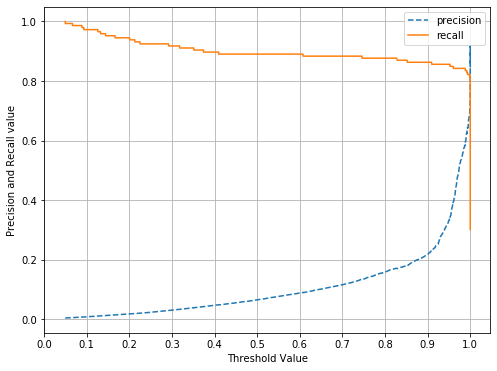

In [28]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

## SMOTE로 오버 샘플링된 데이터 세트로 LGBM 모델 학습/평가

In [29]:
print("### LightGBM 예측 성능 ###")
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test )

### LightGBM 예측 성능 ###
오차행렬
[[85280    15]
 [   26   120]]
정확도: 0.9995, 정밀도: 0.8889, 재현율: 0.8219, F1: 0.8541, AUC:0.9786
